In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2021-04-23T17:00:00,8,Emilia-Romagna,1948,276,2224,52325,54549,-1972,1104,...,13.0,28254.0,3583.0,-1885.0,12.41,4.08,3.91,30.81,-2.13,-3.49
424,2021-04-24T17:00:00,8,Emilia-Romagna,1873,265,2138,50265,52403,-2146,984,...,30.0,28391.0,3834.0,-2060.0,12.39,4.08,3.47,25.67,-3.99,-3.93
425,2021-04-25T17:00:00,8,Emilia-Romagna,1842,265,2107,48374,50481,-1922,1001,...,23.0,16532.0,3231.0,-1891.0,12.58,4.17,6.05,30.98,0.00,-3.67
426,2021-04-26T17:00:00,8,Emilia-Romagna,1861,268,2129,46394,48523,-1958,936,...,17.0,12645.0,2624.0,-1980.0,12.59,4.39,7.40,35.67,1.13,-3.88


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 723
Nuovi tamponi: 30756.0
Percentuale nuovi positivi/nuovi tamponi: 2.0 %
Nuovi guariti: 1418.0
Nuovi deceduti: 19.0
Variazione positivi ricoverati con sintomi: -28.0
Variazione positivi in terapia intensiva: -22.0
Variazione positivi in isolamento dimiciliare: -670.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-26T17:00:00,8,Emilia-Romagna,2092,211,2303,36919,39222,1529,2575,...,30.0,40148.0,6966.0,1487.0,9.16,5.87,6.41,36.97,3.94,4.06
1,2021-02-27T17:00:00,8,Emilia-Romagna,2178,214,2392,38279,40671,1449,2542,...,32.0,32129.0,7640.0,1360.0,8.95,5.88,7.91,33.27,1.42,3.69
2,2021-02-28T17:00:00,8,Emilia-Romagna,2255,227,2482,40196,42678,2007,2610,...,22.0,24606.0,7404.0,1917.0,9.15,5.82,10.61,35.25,6.07,4.93
3,2021-03-01T17:00:00,8,Emilia-Romagna,2375,236,2611,41667,44278,1600,2597,...,23.0,12463.0,3788.0,1471.0,9.04,5.90,20.84,68.56,3.96,3.75
4,2021-03-02T17:00:00,8,Emilia-Romagna,2476,239,2715,43132,45847,1569,2040,...,44.0,40971.0,5741.0,1465.0,8.80,5.92,4.98,35.53,1.27,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-23T17:00:00,8,Emilia-Romagna,1948,276,2224,52325,54549,-1972,1104,...,13.0,28254.0,3583.0,-1885.0,12.41,4.08,3.91,30.81,-2.13,-3.49
57,2021-04-24T17:00:00,8,Emilia-Romagna,1873,265,2138,50265,52403,-2146,984,...,30.0,28391.0,3834.0,-2060.0,12.39,4.08,3.47,25.67,-3.99,-3.93
58,2021-04-25T17:00:00,8,Emilia-Romagna,1842,265,2107,48374,50481,-1922,1001,...,23.0,16532.0,3231.0,-1891.0,12.58,4.17,6.05,30.98,0.00,-3.67
59,2021-04-26T17:00:00,8,Emilia-Romagna,1861,268,2129,46394,48523,-1958,936,...,17.0,12645.0,2624.0,-1980.0,12.59,4.39,7.40,35.67,1.13,-3.88


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

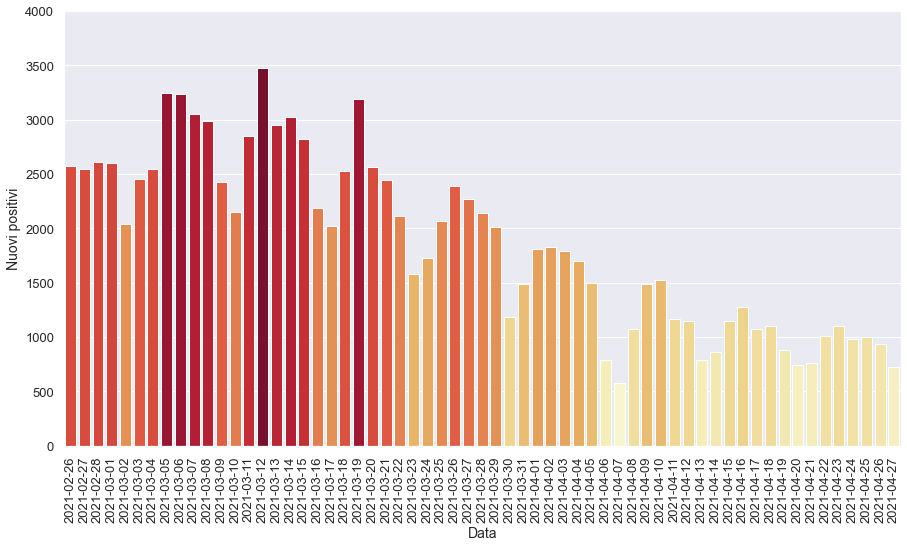

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

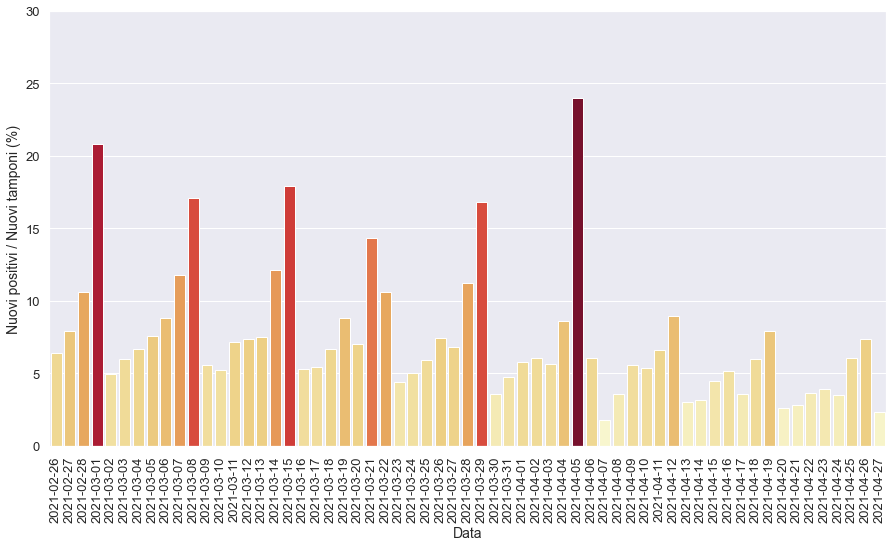

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

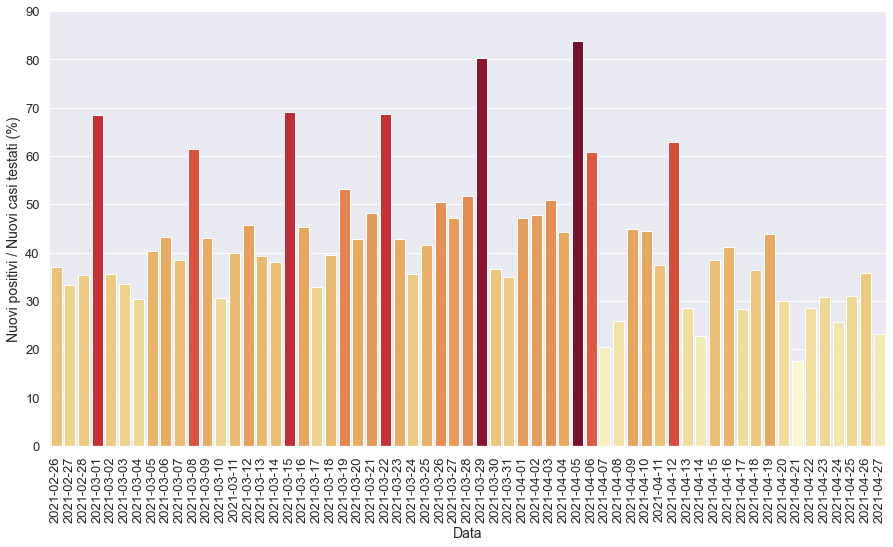

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

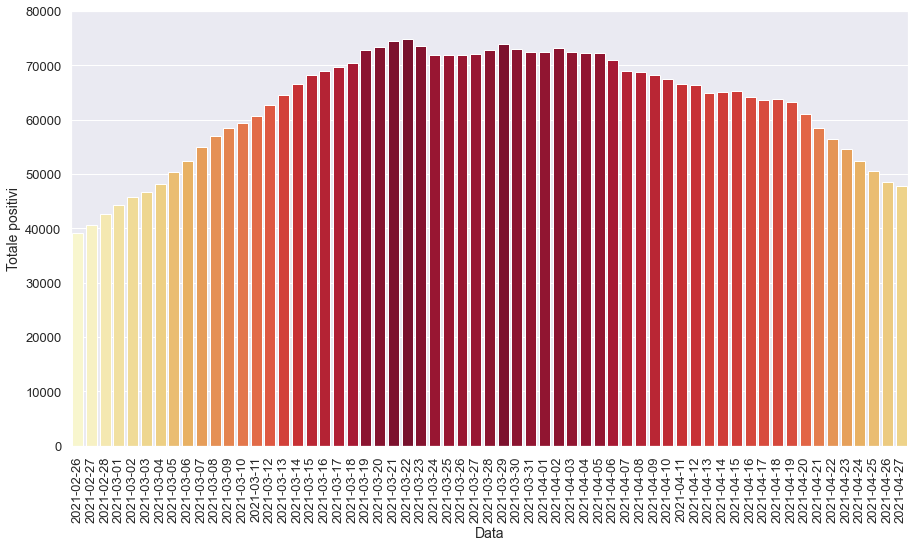

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

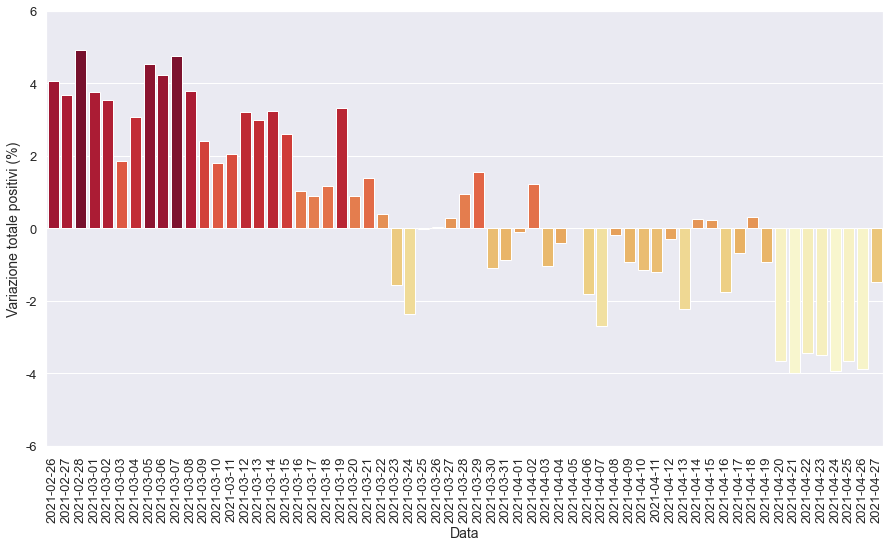

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

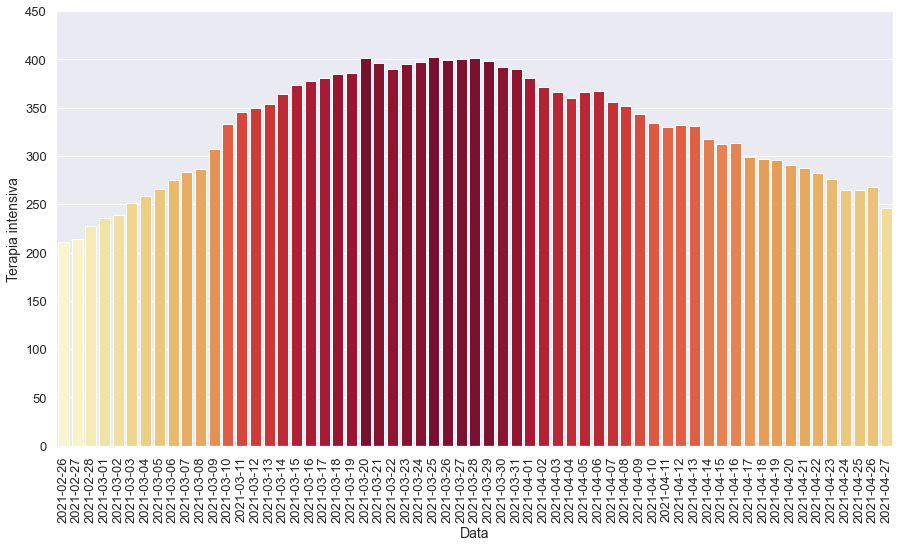

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

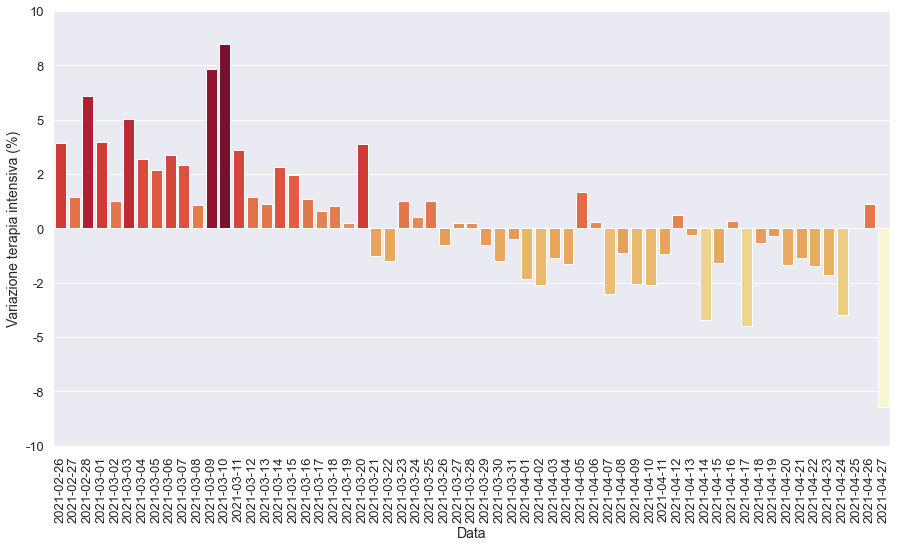

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

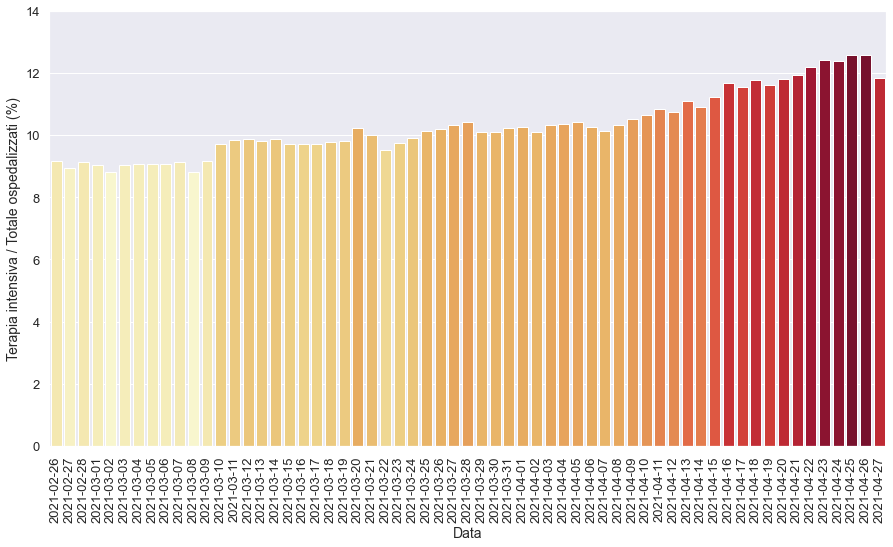

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

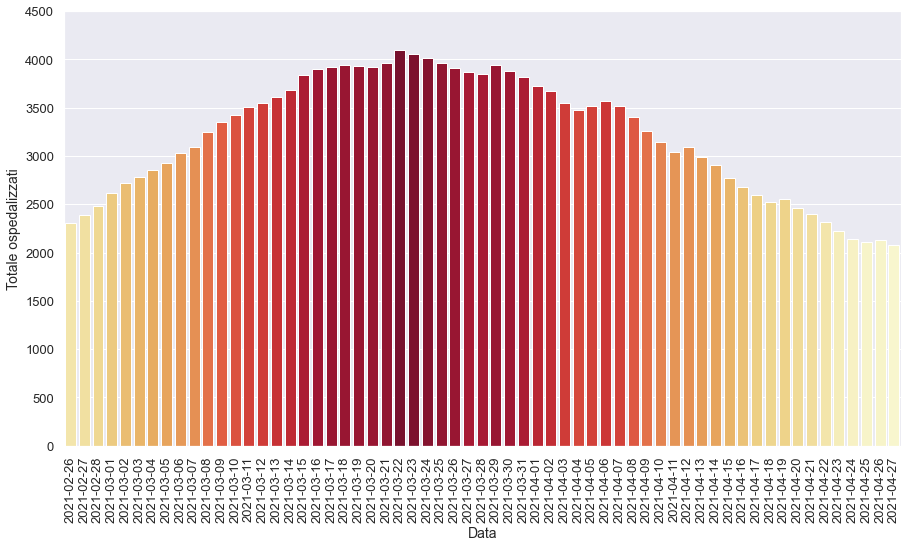

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

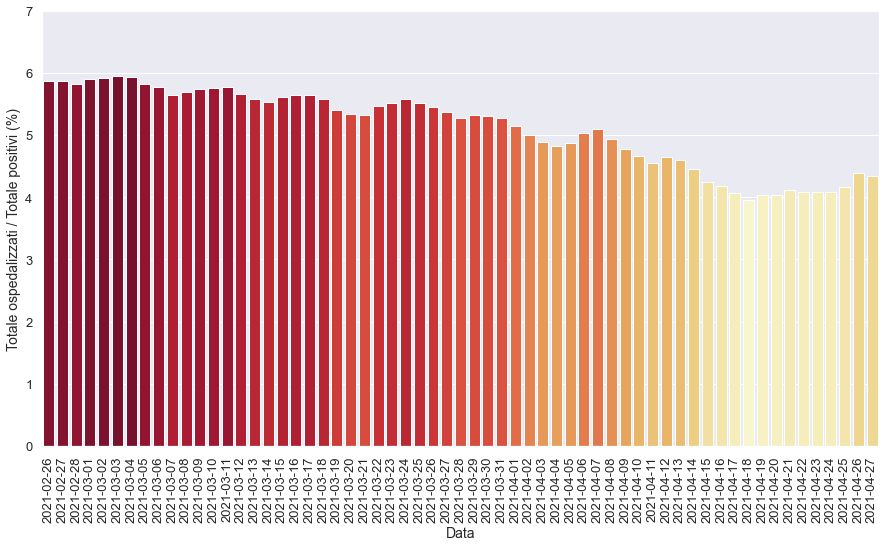

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

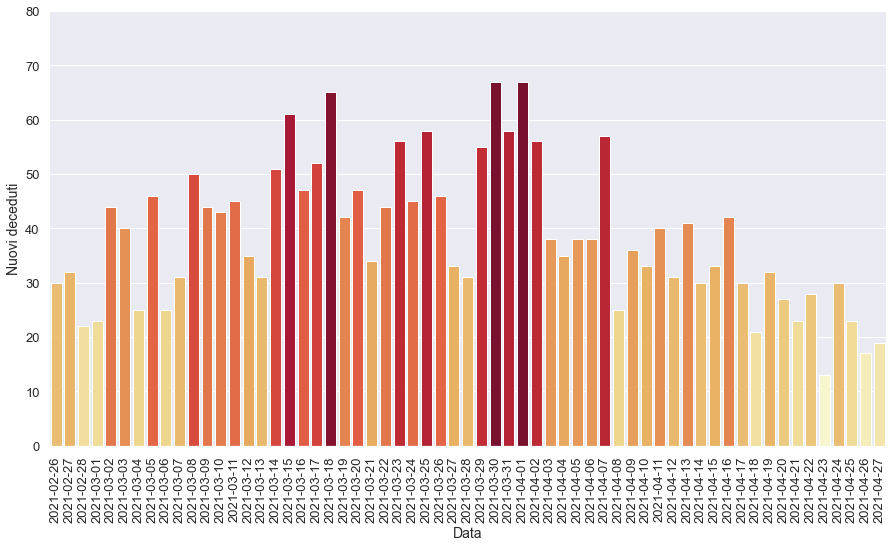

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

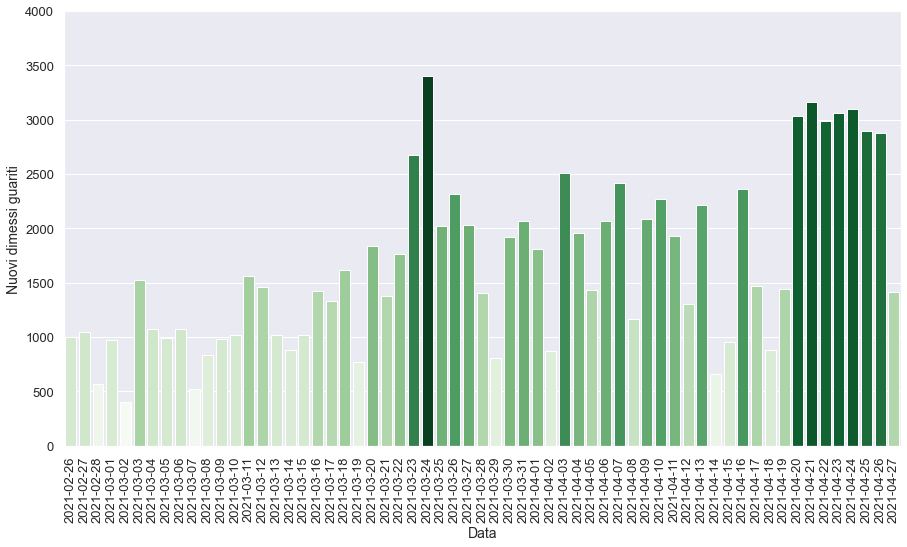

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-28T17:00:00,8,Emilia-Romagna,3442,401,3843,68911,72754,693,2137,...,31.0,19056.0,4128.0,717.0,10.43,5.28,11.21,51.77,0.25,0.96
1,2021-03-29T17:00:00,8,Emilia-Romagna,3540,398,3938,69952,73890,1136,2011,...,55.0,11964.0,2504.0,1041.0,10.11,5.33,16.81,80.31,-0.75,1.56
2,2021-03-30T17:00:00,8,Emilia-Romagna,3486,392,3878,69202,73080,-810,1187,...,67.0,33338.0,3237.0,-750.0,10.11,5.31,3.56,36.67,-1.51,-1.10
3,2021-03-31T17:00:00,8,Emilia-Romagna,3427,390,3817,68618,72435,-645,1490,...,58.0,31192.0,4265.0,-584.0,10.22,5.27,4.78,34.94,-0.51,-0.88
4,2021-04-01T17:00:00,8,Emilia-Romagna,3337,381,3718,68641,72359,-76,1809,...,67.0,31179.0,3835.0,23.0,10.25,5.14,5.80,47.17,-2.31,-0.10
5,2021-04-02T17:00:00,8,Emilia-Romagna,3299,371,3670,69579,73249,890,1830,...,56.0,30248.0,3830.0,938.0,10.11,5.01,6.05,47.78,-2.62,1.23
6,2021-04-03T17:00:00,8,Emilia-Romagna,3181,366,3547,68933,72480,-769,1789,...,38.0,31848.0,3516.0,-646.0,10.32,4.89,5.62,50.88,-1.35,-1.05
7,2021-04-04T17:00:00,8,Emilia-Romagna,3117,360,3477,68711,72188,-292,1700,...,35.0,19778.0,3838.0,-222.0,10.35,4.82,8.60,44.29,-1.64,-0.40
8,2021-04-05T17:00:00,8,Emilia-Romagna,3149,366,3515,68691,72206,18,1493,...,38.0,6229.0,1784.0,-20.0,10.41,4.87,23.97,83.69,1.67,0.02
9,2021-04-06T17:00:00,8,Emilia-Romagna,3206,367,3573,67317,70890,-1316,791,...,38.0,13003.0,1303.0,-1374.0,10.27,5.04,6.08,60.71,0.27,-1.82


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

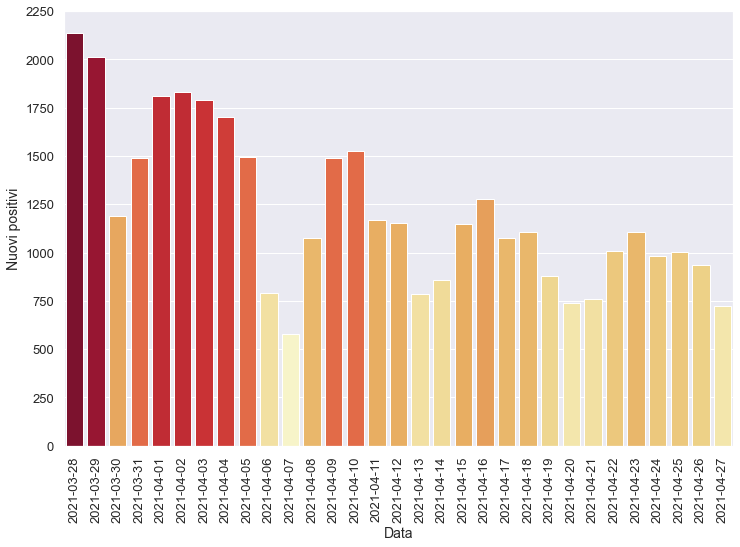

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

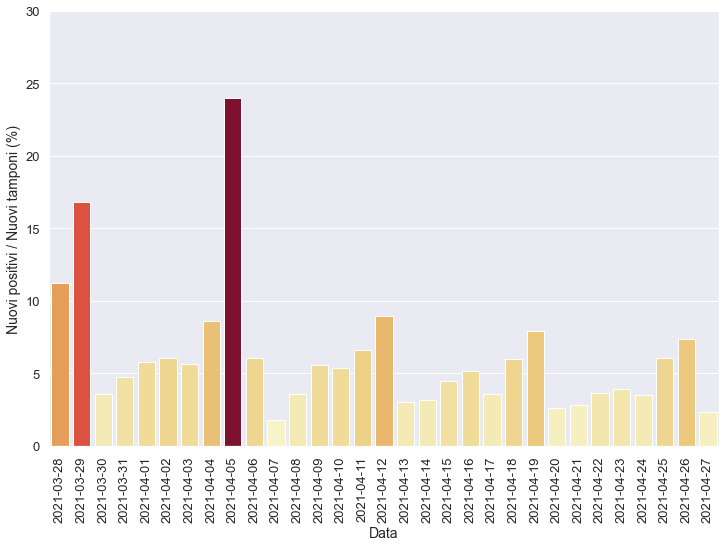

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

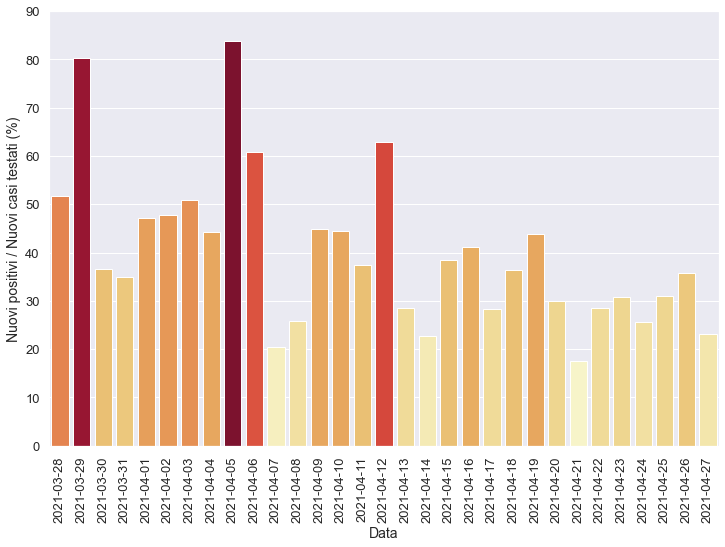

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

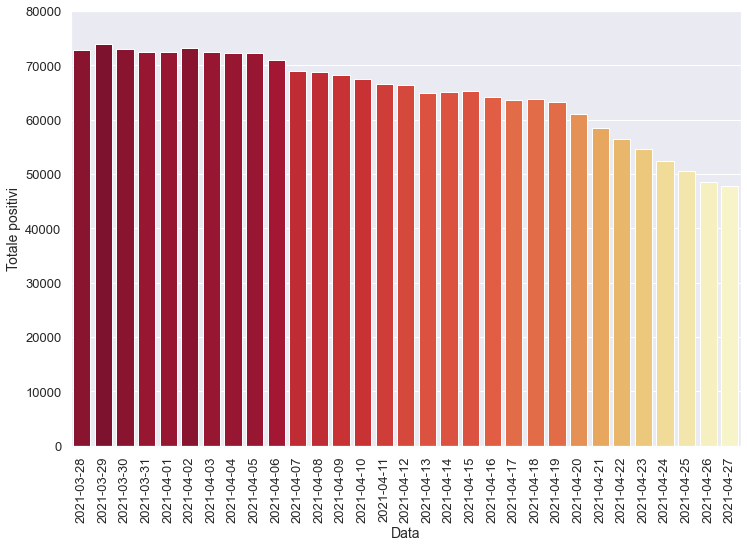

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

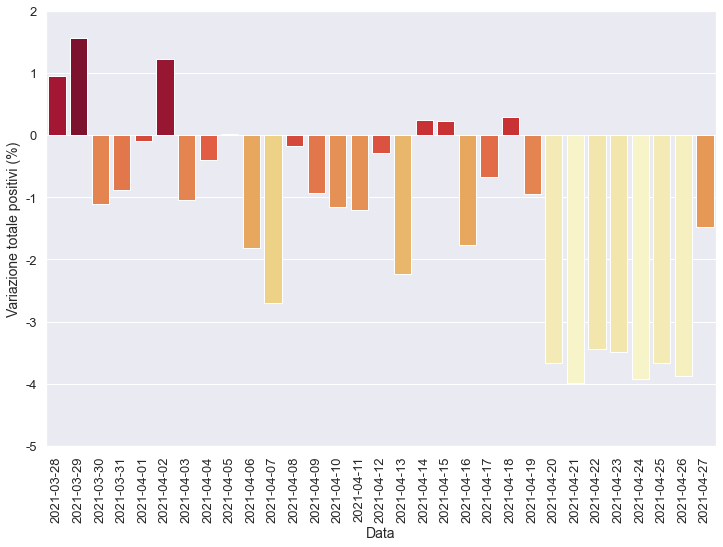

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

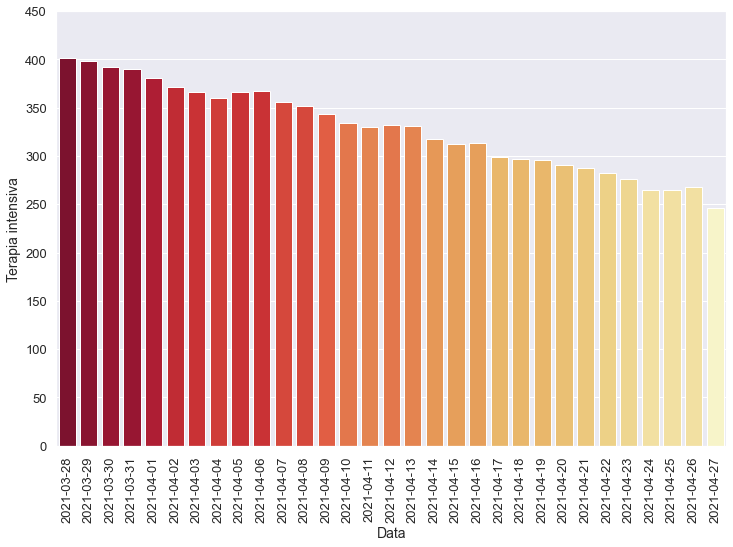

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

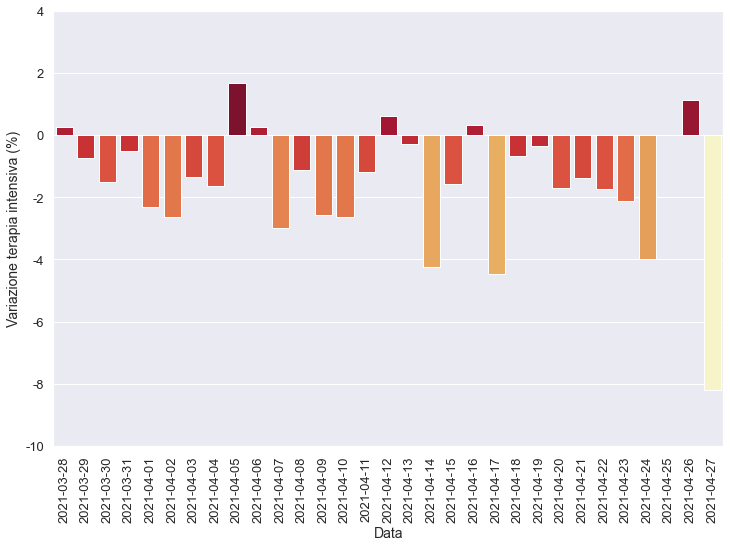

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

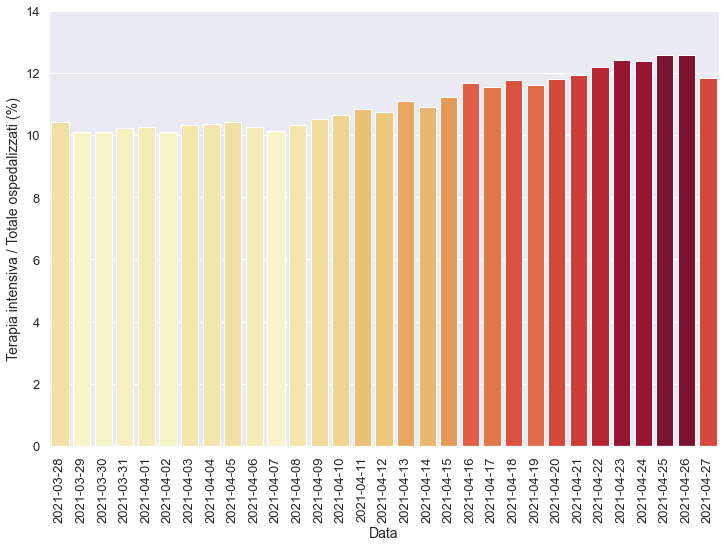

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

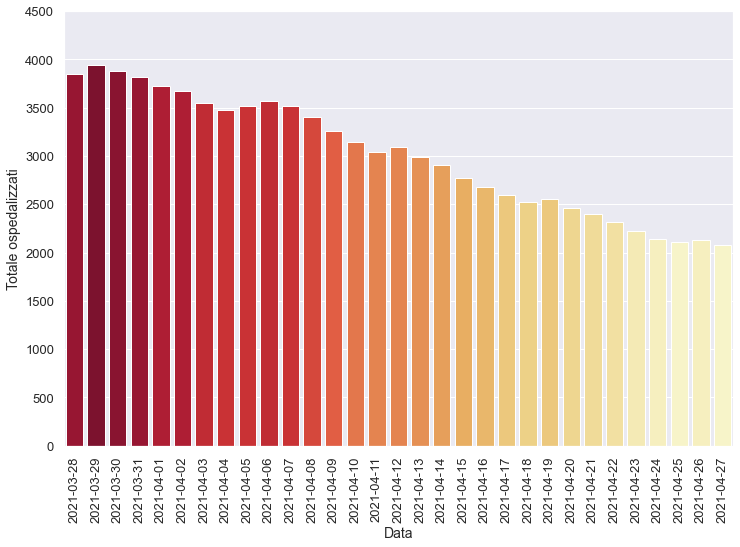

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

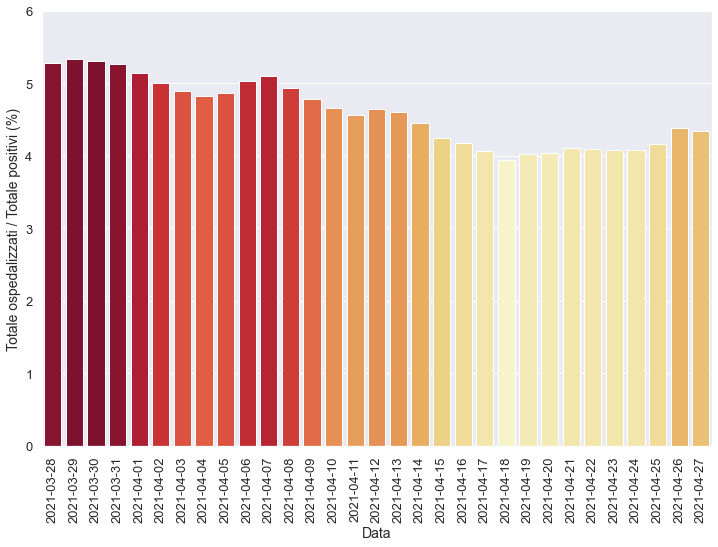

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

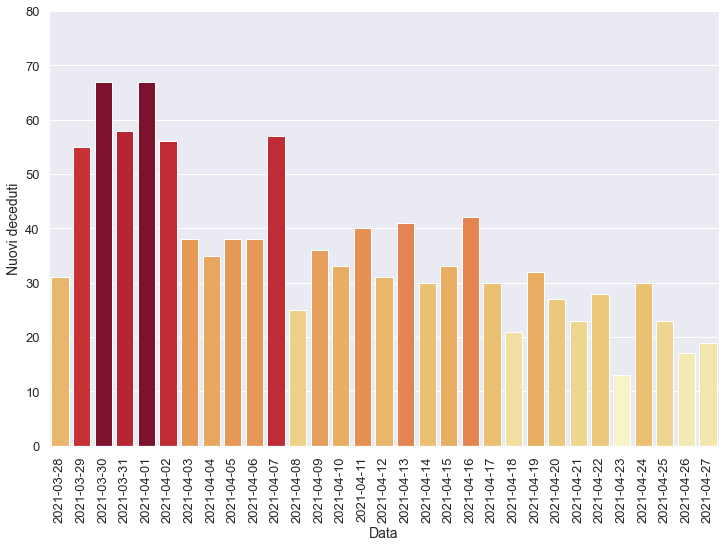

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

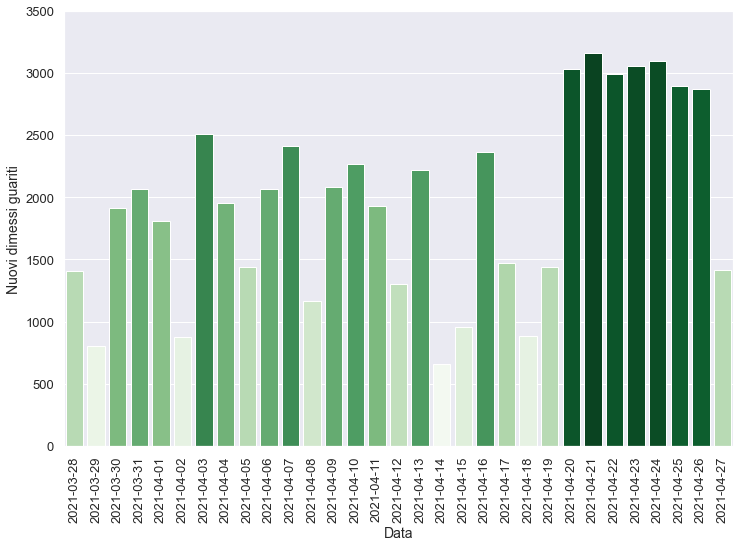

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-20T17:00:00,8,Emilia-Romagna,2171,291,2462,58501,60963,-2324,740,...,27.0,28134.0,2461.0,-2234.0,11.82,4.04,2.63,30.07,-1.69,-3.67
1,2021-04-21T17:00:00,8,Emilia-Romagna,2116,287,2403,56130,58533,-2430,760,...,23.0,27263.0,4344.0,-2371.0,11.94,4.11,2.79,17.50,-1.37,-3.99
2,2021-04-22T17:00:00,8,Emilia-Romagna,2029,282,2311,54210,56521,-2012,1010,...,28.0,27511.0,3553.0,-1920.0,12.20,4.09,3.67,28.43,-1.74,-3.44
3,2021-04-23T17:00:00,8,Emilia-Romagna,1948,276,2224,52325,54549,-1972,1104,...,13.0,28254.0,3583.0,-1885.0,12.41,4.08,3.91,30.81,-2.13,-3.49
4,2021-04-24T17:00:00,8,Emilia-Romagna,1873,265,2138,50265,52403,-2146,984,...,30.0,28391.0,3834.0,-2060.0,12.39,4.08,3.47,25.67,-3.99,-3.93
5,2021-04-25T17:00:00,8,Emilia-Romagna,1842,265,2107,48374,50481,-1922,1001,...,23.0,16532.0,3231.0,-1891.0,12.58,4.17,6.05,30.98,0.00,-3.67
6,2021-04-26T17:00:00,8,Emilia-Romagna,1861,268,2129,46394,48523,-1958,936,...,17.0,12645.0,2624.0,-1980.0,12.59,4.39,7.40,35.67,1.13,-3.88
7,2021-04-27T17:00:00,8,Emilia-Romagna,1833,246,2079,45724,47803,-720,723,...,19.0,30756.0,3125.0,-670.0,11.83,4.35,2.35,23.14,-8.21,-1.48


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

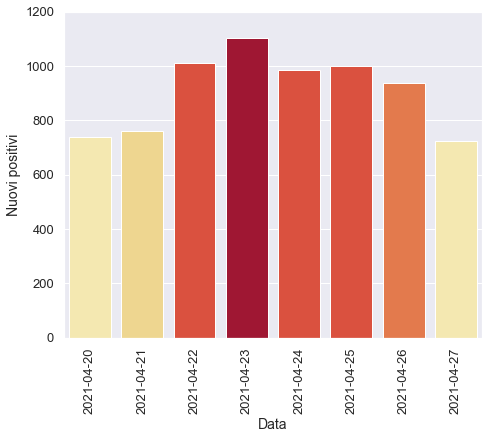

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

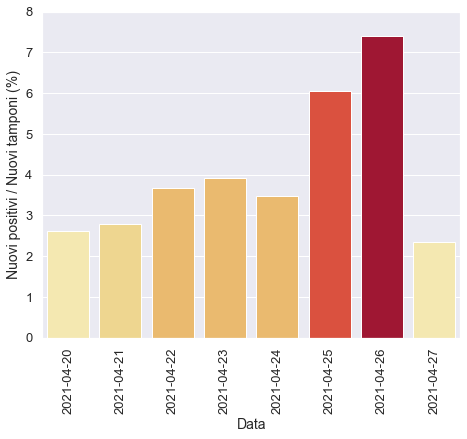

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

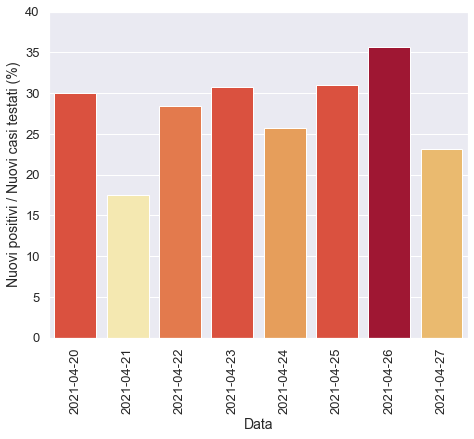

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

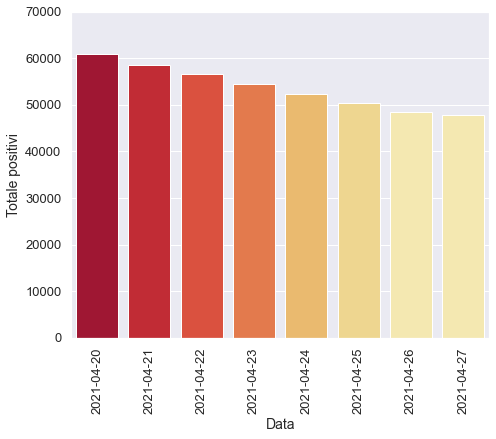

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

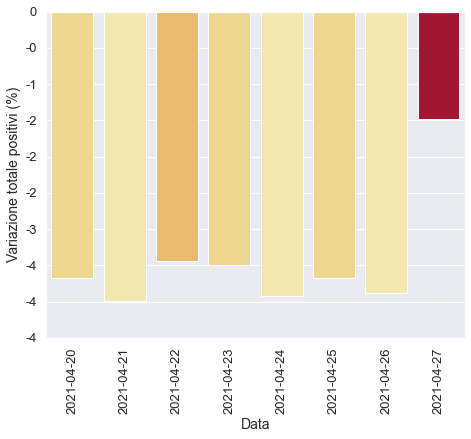

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

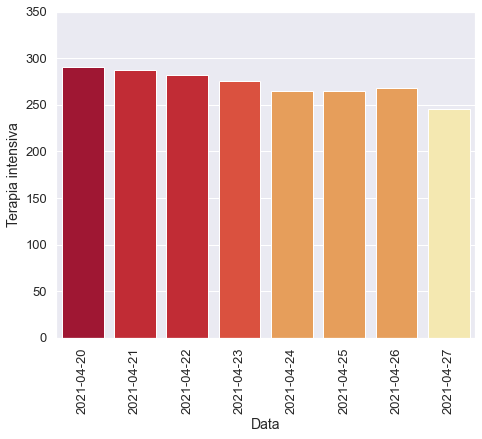

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

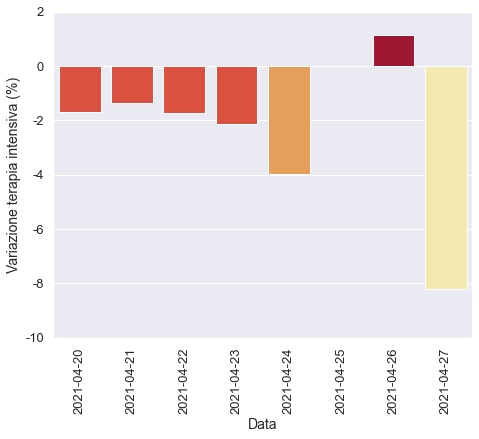

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

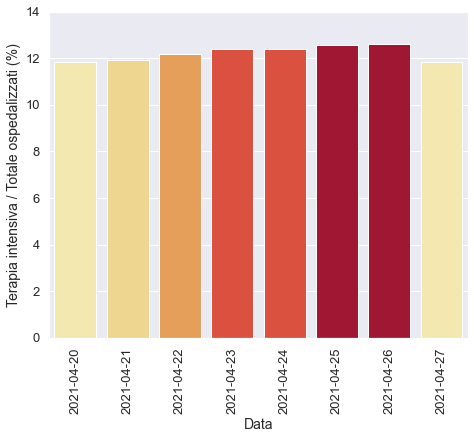

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

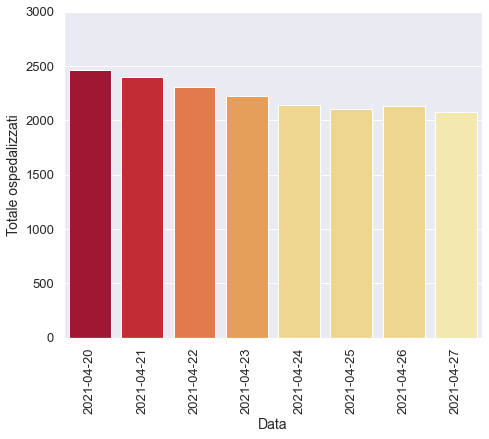

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

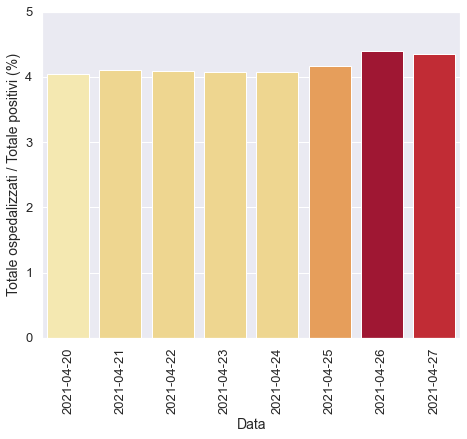

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

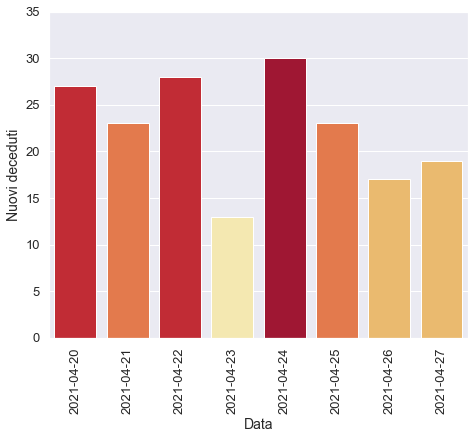

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

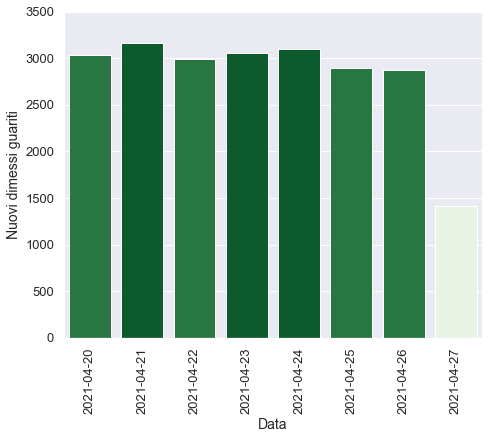

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)